#Load library

In [1]:
!pip install skfeature-chappers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.4 MB/s eta 0:00:00


In [29]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#import library Keras Deep Learning Framework
from keras.models import Sequential
from keras.layers import Dense
import joblib
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Load dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/tubes ildat
!ls

Mounted at /content/drive
/content/drive/My Drive/tubes ildat
data_keuangan_labeled.csv	    finance_boosting_model.sav
dataset_keuangan.csv		    scaler_finance_bagging.sav
finance_boosting_model_bagging.sav  scaler_finance.sav


In [5]:
import pandas as pd

file_path = '/content/drive/My Drive/tubes ildat/data_keuangan_labeled.csv'
df = pd.read_csv(file_path)
display(df.head())

,Gaji,Tabungan Lama,Investasi,Pemasukan Lainnya,Tipe,Bahan Pokok,Protein & Gizi Tambahan,Tempat Tinggal,Sandang,Konsumsi Praktis,Barang & Jasa Sekunder,Pengeluaran Tidak Esensial,Pajak,Asuransi,Sosial & Budaya,Tabungan / Investasi,cluster,cluster_label
0,24333000.0,1629000.0,7891000.0,3861000.0,normal,3694000.0,3570000.0,10682000.0,994000.0,5563000.0,5140000.0,1282000.0,876000.0,528000.0,458000.0,4950000.0,0,Rawan Finansial
1,3535000.0,733000.0,785000.0,659000.0,hemat,383000.0,994000.0,1432000.0,134000.0,438000.0,475000.0,230000.0,159000.0,263000.0,174000.0,1062000.0,1,Menengah Stabil
2,65000000.0,9642000.0,13643000.0,10842000.0,hemat,7849000.0,13081000.0,24853000.0,1810000.0,3819000.0,6465000.0,2545000.0,4910000.0,3580000.0,4686000.0,24775000.0,2,Sehat Finansial
3,54676000.0,5037000.0,18466000.0,4826000.0,normal,5367000.0,13703000.0,16628000.0,2746000.0,8826000.0,11029000.0,3489000.0,2308000.0,2015000.0,1759000.0,14771000.0,2,Sehat Finansial
4,24298000.0,4665000.0,4964000.0,2649000.0,boros,2169000.0,5477000.0,7866000.0,366000.0,8454000.0,6060000.0,2956000.0,277000.0,285000.0,438000.0,2300000.0,0,Rawan Finansial


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gaji                        16000 non-null  float64
 1   Tabungan Lama               16000 non-null  float64
 2   Investasi                   16000 non-null  float64
 3   Pemasukan Lainnya           16000 non-null  float64
 4   Tipe                        16000 non-null  object 
 5   Bahan Pokok                 16000 non-null  float64
 6   Protein & Gizi Tambahan     16000 non-null  float64
 7   Tempat Tinggal              16000 non-null  float64
 8   Sandang                     16000 non-null  float64
 9   Konsumsi Praktis            16000 non-null  float64
 10  Barang & Jasa Sekunder      16000 non-null  float64
 11  Pengeluaran Tidak Esensial  16000 non-null  float64
 12  Pajak                       16000 non-null  float64
 13  Asuransi                    160

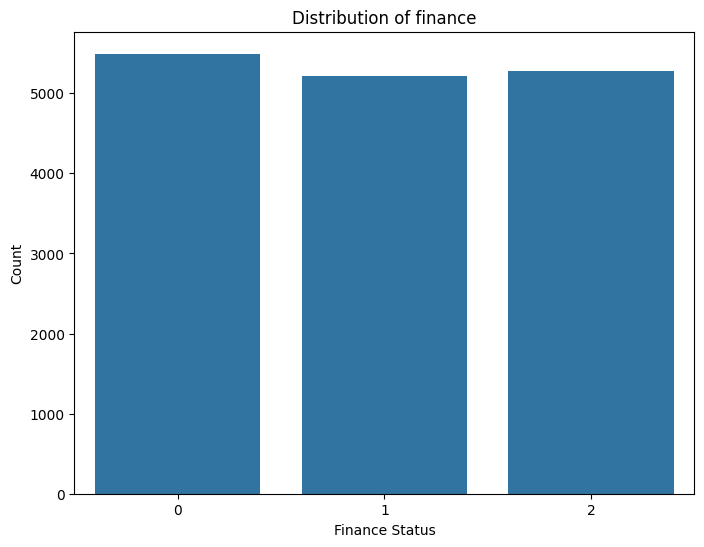

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame as defined in the previous code

plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df)
plt.title('Distribution of finance')
plt.xlabel('Finance Status')
plt.ylabel('Count')
plt.show()

In [9]:
dataset = df.drop(columns='cluster_label')

In [10]:
mapping_tipe = {
    'hemat': 0,
    'normal': 1,
    'boros': 2
}

dataset['Tipe'] = dataset['Tipe'].map(mapping_tipe)
dataset

,Gaji,Tabungan Lama,Investasi,Pemasukan Lainnya,Tipe,Bahan Pokok,Protein & Gizi Tambahan,Tempat Tinggal,Sandang,Konsumsi Praktis,Barang & Jasa Sekunder,Pengeluaran Tidak Esensial,Pajak,Asuransi,Sosial & Budaya,Tabungan / Investasi,cluster
0,24333000.0,1629000.0,7891000.0,3861000.0,1,3694000.0,3570000.0,10682000.0,994000.0,5563000.0,5140000.0,1282000.0,876000.0,528000.0,458000.0,4950000.0,0
1,3535000.0,733000.0,785000.0,659000.0,0,383000.0,994000.0,1432000.0,134000.0,438000.0,475000.0,230000.0,159000.0,263000.0,174000.0,1062000.0,1
2,65000000.0,9642000.0,13643000.0,10842000.0,0,7849000.0,13081000.0,24853000.0,1810000.0,3819000.0,6465000.0,2545000.0,4910000.0,3580000.0,4686000.0,24775000.0,2
3,54676000.0,5037000.0,18466000.0,4826000.0,1,5367000.0,13703000.0,16628000.0,2746000.0,8826000.0,11029000.0,3489000.0,2308000.0,2015000.0,1759000.0,14771000.0,2
4,24298000.0,4665000.0,4964000.0,2649000.0,2,2169000.0,5477000.0,7866000.0,366000.0,8454000.0,6060000.0,2956000.0,277000.0,285000.0,438000.0,2300000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,38323000.0,4781000.0,11977000.0,6186000.0,2,3317000.0,7279000.0,10936000.0,1968000.0,11867000.0,13335000.0,6414000.0,543000.0,369000.0,594000.0,4709000.0,0
15996,13432000.0,2485000.0,4412000.0,1166000.0,1,2864000.0,3543000.0,7092000.0,382000.0,1506000.0,2290000.0,719000.0,353000.0,644000.0,358000.0,1873000.0,1
15997,22432000.0,3639000.0,8754000.0,5595000.0,0,1922000.0,5125000.0,11150000.0,631000.0,3321000.0,4375000.0,1056000.0,1263000.0,1052000.0,1562000.0,8887000.0,0
15998,22499000.0,4321000.0,7354000.0,2934000.0,0,3641000.0,3978000.0,10231000.0,960000.0,3589000.0,2492000.0,822000.0,1472000.0,1425000.0,1161000.0,7332000.0,0


#Memisahkan feature dan label

In [11]:
X = dataset.drop(columns=['cluster'])
y = dataset['cluster']

In [12]:
X

,Gaji,Tabungan Lama,Investasi,Pemasukan Lainnya,Tipe,Bahan Pokok,Protein & Gizi Tambahan,Tempat Tinggal,Sandang,Konsumsi Praktis,Barang & Jasa Sekunder,Pengeluaran Tidak Esensial,Pajak,Asuransi,Sosial & Budaya,Tabungan / Investasi
0,24333000.0,1629000.0,7891000.0,3861000.0,1,3694000.0,3570000.0,10682000.0,994000.0,5563000.0,5140000.0,1282000.0,876000.0,528000.0,458000.0,4950000.0
1,3535000.0,733000.0,785000.0,659000.0,0,383000.0,994000.0,1432000.0,134000.0,438000.0,475000.0,230000.0,159000.0,263000.0,174000.0,1062000.0
2,65000000.0,9642000.0,13643000.0,10842000.0,0,7849000.0,13081000.0,24853000.0,1810000.0,3819000.0,6465000.0,2545000.0,4910000.0,3580000.0,4686000.0,24775000.0
3,54676000.0,5037000.0,18466000.0,4826000.0,1,5367000.0,13703000.0,16628000.0,2746000.0,8826000.0,11029000.0,3489000.0,2308000.0,2015000.0,1759000.0,14771000.0
4,24298000.0,4665000.0,4964000.0,2649000.0,2,2169000.0,5477000.0,7866000.0,366000.0,8454000.0,6060000.0,2956000.0,277000.0,285000.0,438000.0,2300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,38323000.0,4781000.0,11977000.0,6186000.0,2,3317000.0,7279000.0,10936000.0,1968000.0,11867000.0,13335000.0,6414000.0,543000.0,369000.0,594000.0,4709000.0
15996,13432000.0,2485000.0,4412000.0,1166000.0,1,2864000.0,3543000.0,7092000.0,382000.0,1506000.0,2290000.0,719000.0,353000.0,644000.0,358000.0,1873000.0
15997,22432000.0,3639000.0,8754000.0,5595000.0,0,1922000.0,5125000.0,11150000.0,631000.0,3321000.0,4375000.0,1056000.0,1263000.0,1052000.0,1562000.0,8887000.0
15998,22499000.0,4321000.0,7354000.0,2934000.0,0,3641000.0,3978000.0,10231000.0,960000.0,3589000.0,2492000.0,822000.0,1472000.0,1425000.0,1161000.0,7332000.0


#Feature Selection

In [13]:
from skfeature.function.information_theoretical_based import MRMR

# convert menjadi numpy array
X_np = X.values
y_np = y.values

# MRMR sebelum scaling
ranked_index = MRMR.mrmr(X_np, y_np, n_selected_features=X_np.shape[1])

print("\nMRMR Ranking Index:")
print(ranked_index)

# fitur terurut sesuai MRMR
X_mrmr = X_np[:, ranked_index]

print("\nFitur hasil urutan MRMR:")
print(X_mrmr)


MRMR Ranking Index:
[15 11  7  1  2  3  4 10 14 12  9  6 13  5  0  8]

Fitur hasil urutan MRMR:
[[ 4950000.  1282000. 10682000. ...  3694000. 24333000.   994000.]
 [ 1062000.   230000.  1432000. ...   383000.  3535000.   134000.]
 [24775000.  2545000. 24853000. ...  7849000. 65000000.  1810000.]
 ...
 [ 8887000.  1056000. 11150000. ...  1922000. 22432000.   631000.]
 [ 7332000.   822000. 10231000. ...  3641000. 22499000.   960000.]
 [ 4421000.   773000.  7163000. ...  2199000. 13675000.   235000.]]


#Membagi dataset menjadi data training dan data testing

In [14]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_mrmr, y_np, test_size=0.3, random_state=42, stratify=y_np
)

#Feature scaling

In [15]:
scaler = StandardScaler()
scaler.fit(X_train_raw)

# save
import joblib
joblib.dump(scaler, '/content/drive/My Drive/tubes ildat/scaler_finance_voting.sav')

# load (opsional)
scaler = joblib.load('/content/drive/My Drive/tubes ildat/scaler_finance_voting.sav')

# transform
X_train = scaler.transform(X_train_raw)
X_test  = scaler.transform(X_test_raw)

#Hyperparameter optimization

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb

model = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(
            max_iter=1000,
            multi_class='multinomial',
            random_state=42
        )),
        ('svm', SVC(
            kernel='rbf',
            probability=True,
            random_state=42
        )),
        ('xgb', xgb.XGBClassifier(
            objective='multi:softprob',
            num_class=3,
            eval_metric='mlogloss',
            tree_method='hist',
            random_state=42
        ))
    ],
    voting='soft'
)

# Melatih model (Pastikan X_train dan y_train sudah didefinisikan sebelumnya)
model.fit(X_train, y_train)

print("Model:", model)
print("Base Estimators:", model.estimators_)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model: VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 multi_class='multinomial',
                                                 random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=Fa...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
   

#Hasil prediksi

In [24]:
predictions = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1648
           1       1.00      0.99      0.99      1567
           2       1.00      0.99      1.00      1585

    accuracy                           0.99      4800
   macro avg       0.99      0.99      0.99      4800
weighted avg       0.99      0.99      0.99      4800




Confusion Matrix:


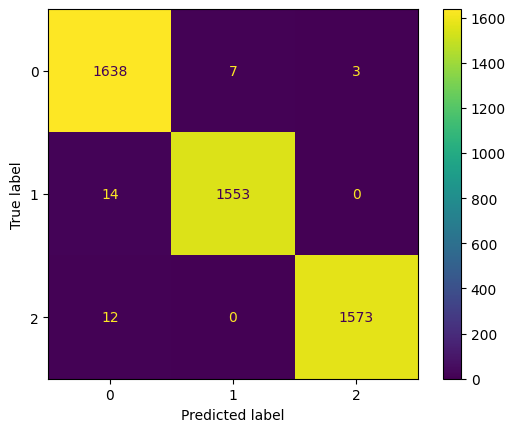

In [25]:
#plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

#Save Model

In [28]:
filename = '/content/drive/My Drive/tubes ildat/finance_voting_model.sav'

# VotingClassifier tidak punya 'best_estimator_'. Simpan objek 'model' langsung.
joblib.dump(model, filename)
print(f"\nModel berhasil disimpan ke: {filename}")

# Load model untuk pengujian
loaded_model = joblib.load(filename)
print("\nLoaded Model:", loaded_model)

# Bandingkan akurasi
print('Akurasi model yang dimuat:', loaded_model.score(X_test, y_test))
print('Akurasi model langsung:', model.score(X_test, y_test))


Model berhasil disimpan ke: /content/drive/My Drive/tubes ildat/finance_voting_model.sav

Loaded Model: VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 multi_class='multinomial',
                                                 random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=Fa...
                                            f